# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Описание данных
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

*Пояснение: апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания.*

## Изучаем общую информацию о данных

In [1]:
import pandas as pd
df = pd.read_csv('real_estate_data.csv', sep='\t', decimal=',')
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,...,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,...,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00000000000003
9,18,5400000.0,61.0,2017-02-26T00:00:00,3,2.5,9.0,43.6,7,NaN,...,6.5,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
df.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.0,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.5,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.00000000000001
23696,18,2500000.0,56.7,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,...,23.3,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.3,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,...,9.0,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null object
total_area              23699 non-null object
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null object
floors_total            23613 non-null object
living_area             21796 non-null object
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null object
balcony                 12180 non-null object
locality_name           23650 non-null object
airports_nearest        18157 non-null object
cityCenters_nearest     18180 non-null object
parks_around3000        18181 non-null object
parks_nearest           8079 non-null object
ponds_around3000        18

**Вывод**

Итак, у нас имеется датасет из > 23к наблюдений и 21 атрибут. 
Бегло просмотрев сводную информацию по датафрейму, можно сделать следующие наблюдения:
1. Много пропусков в `ceiling_height`, `balcony`, `parks_nearest`, `ponds_nearest`, нужно будет их заполнить.
2. Тип данных во многих столбцах вещественный, хотя должен был бы быть числовой, например `last_price`, `total_area` никак нельзя оставлять строками, нужно будет перевести такие столбцы в тип float.
3. Также есть пара атрибутов, где тип данных булев: `studio`, `open_plan` . Из описания данных мы также знаем, что в столбце `is_apartment` должен быть булев тип, но в info вышло почему-то object, надо перепроверить.

## Предобработка данных

### Обработка пропущенных значений
Для начала посмотрим, в каких столбцах есть пропуски и сколько их, а дальше решим, как лучше всего их заполнить, чтобы случайно не исказить данные.

In [4]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Больше всего пропусков в столбце `is_apartment`, посмотрим, что там за значения.

In [5]:
df['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Логичнее всего предположить, что большинство квартир на продажу должны иметь значение `is_apartment = False`, т.к. это нежилой фонд. Заменим все пропуски на False.

In [6]:
df.loc[df['is_apartment'].isnull(), 'is_apartment'] = False

#Проверка
df['is_apartment'].value_counts()

False    23649
True        50
Name: is_apartment, dtype: int64

В столбце `ceiling_height` больше 9 тысяч пропусков, но здесь вряд ли стоит заполнять, потому что у нас нет никаких догадок, какие именно значения могли быть пропущены, а заменять на среднее никакого смысла нет, ведь высота потолков в домах в основном стандартная.

Далее посмотрим на пропуски в `parks_nearest` и `ponds_nearest` (расстояние до ближайшего парка и водоема). Также имеет смысл посмотреть на значения в связке с `parks_around3000` и  `ponds_around3000` (количество парков и водоемов в радиусе 3 км). Вероятно, если значения там пропущены, то ни парков, ни водоемов поблизости нет.

In [7]:
df[df['parks_nearest'].isnull()]['parks_around3000'].value_counts()

0.0    10102
Name: parks_around3000, dtype: int64

In [8]:
df[df['ponds_nearest'].isnull()]['ponds_around3000'].value_counts()

0.0    9071
Name: ponds_around3000, dtype: int64

Там где пропуски в столбцах `ponds_around3000` и `parks_around3000`, скорее всего, парков и водоемов поблизости нет - заменим на 0.

Во всех остальных случаях, где пропуски в `parks_nearest` и `ponds_nearest`, но `ponds_around3000` и `parks_around3000` больше 0, заменим на медианное значение.

Там где никаких парков и водоемов поблизости нет, не будем заменять пропуски в `parks_nearest` и `ponds_nearest` на 0. Сделаем техническую замену на 9999, чтобы было понятно, что это не настоящее значение, но и пропуск будет заполнен.

In [9]:
#заполняем нулями пропущенные там, где нет парка и водоема поблизости
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)

#считаем медианы по столбцам parks_nearest и ponds_nearest
parks_median = df['parks_nearest'].median()
ponds_median = df['ponds_nearest'].median()

#там где кол-во парков и водоемов 0, заполняем 9999
df.loc[df['parks_around3000'] == 0, 'parks_nearest'] = 9999
df.loc[df['ponds_around3000'] == 0, 'ponds_nearest'] = 9999

#где водоем или парк есть, но не указано расстояние, заполним медианой
df['parks_nearest'] = df['parks_nearest'].fillna(value=parks_median)
df['ponds_nearest'] = df['ponds_nearest'].fillna(value=ponds_median)

В столбцах `locality_name` и `floors_total` совсем немного пропущенных значений (меньше 0.5% от всех наблюдений), и в то же время это важные столбцы для расчетов, поэтому лучше всего строки с этими пропусками удалить.

In [10]:
df.dropna(subset = ['locality_name'], inplace = True)
df.dropna(subset = ['floors_total'], inplace = True)

Смотрим, что еще осталось.

In [11]:
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                 11475
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest               0
ponds_around3000            0
ponds_nearest               0
days_exposition          3171
dtype: int64

Пропуски в `airports_nearest` и `cityCenters_nearest` заполним медианными значениями, предварительно сгруппировав по району. Чтобы подстраховаться, предварительно приведем значения к числовому типу, иначе не получится посчитать медианы.

In [12]:
df['airports_nearest'] = df['airports_nearest'].apply(pd.to_numeric)
df['cityCenters_nearest'] = df['cityCenters_nearest'].apply(pd.to_numeric)

df['airports_nearest'] = df['airports_nearest'].fillna(df.groupby('locality_name')['airports_nearest'].transform('median'))
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(df.groupby('locality_name')['cityCenters_nearest'].transform('median'))

Пропуски в `balcony` заполним нулями. Предположим, что, если количество балконов не указано, то их нет.

In [13]:
df.loc[df['balcony'].isnull(), 'balcony'] = 0
#Проверка
df['balcony'].isnull().sum()

0

Пропуски в `kitchen_area` заполним просто медианными значениями, а в `living_area` медианой в зависимости от количества комнат. Опять же, предварительно все 3 столбца приведем к числовому типу.

In [14]:
df['kitchen_area'] = df['kitchen_area'].apply(pd.to_numeric)
df['living_area'] = df['living_area'].apply(pd.to_numeric)
df['rooms'] = df['rooms'].apply(pd.to_numeric).astype('int') #кол-во комнат должно быть целым числом

df['kitchen_area'] = df['kitchen_area'].fillna(df['kitchen_area'].median())
df['living_area'] = df['living_area'].fillna(df.groupby('rooms')['living_area'].transform('median'))

С `days_exposition` не все однозначно, лучше всего оставить пропуски как есть, чтобы не искажать данные.


**Вывод**

Итак, мы заполнили пропуски в числовых данных медианами там, где это было возможно. Там, где скорее всего атрибут отсутствует (например, балкон или парк), заполнили просто нулями. В столбцах, где нельзя было предположить, какие значения пропущены, не заполняем.

### Приведение данных к нужным типам

Еще раз взглянем на типы данных по столбцам.

In [15]:
df.dtypes

total_images              int64
last_price               object
total_area               object
first_day_exposition     object
rooms                     int64
ceiling_height           object
floors_total             object
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                  object
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000         object
parks_nearest            object
ponds_around3000         object
ponds_nearest            object
days_exposition          object
dtype: object

Данные по следующим столбцам нужно привести к числовому типу (float): 
- `last_price`, 
- `total_area`, 
- `ceiling_height`, 
- `parks_nearest`, 
- `ponds_nearest`, 
- `days_exposition`.

Чтобы вовремя заметить возможные ошибки и знать, если в каком-либо столбце не получилось конвертировать данные, применим конструкцию `try-except`.

In [16]:
for col in df[['last_price', 'total_area', 'ceiling_height', 'parks_nearest', 'ponds_nearest', 'days_exposition']]:
    try:
        df[col] = df[col].apply(pd.to_numeric)
    except:
        print('could not convert type in', col)

Супер, никаких ошибок не произошло! Идем дальше. 

А в этих столбцах логичнее всего привести все значения к целым числам: 
- `floors_total`, 
- `balcony`, 
- `parks_around3000`, 
- `ponds_around3000`.

In [17]:
for col in df[['floors_total', 'balcony', 'parks_around3000', 'ponds_around3000']]:
    try:
        df[col] = df[col].apply(pd.to_numeric).astype('int')
    except:
        print('error in column', col)

В столбце `first_day_exposition` нам нужны даты, а не строки.

In [18]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Также необходимо удалить дубликаты, если они есть.

In [19]:
df.duplicated().sum()

0

Дубликатов в датасете нет, даже удивительно:) 

Еще раз смотрим на получившийся после всей предобработки датафрейм.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23565 non-null int64
last_price              23565 non-null float64
total_area              23565 non-null float64
first_day_exposition    23565 non-null datetime64[ns]
rooms                   23565 non-null int64
ceiling_height          14481 non-null float64
floors_total            23565 non-null int64
living_area             23565 non-null float64
floor                   23565 non-null int64
is_apartment            23565 non-null bool
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            23565 non-null float64
balcony                 23565 non-null int64
locality_name           23565 non-null object
airports_nearest        18133 non-null float64
cityCenters_nearest     18133 non-null float64
parks_around3000        23565 non-null int64
parks_nearest           23565 non-null float64
ponds_around3

**Вывод**

Итак, мы заполнили пропуски там, где логично было предположить, что значения равны 0, или где было допустимо заполнить числовые значения медианами, не рискуя сильно исказить данные. Конечно, необходимо разобраться в причинах пропусков. Возможно, случились технические ошибки при выгрузке в каких-то из атрибутов, ну а скорее всего многие значения изначально не были указаны пользователями, разместившими объявления, и это нормально. Там где адекватной замены пропуска нет, оставляем все как есть, например в `days_exposition`.

Также мы изменили типы данных с вещественного на числовой в тех столбцах, где это было необходимо, и в одном столбце привели данные к типу datetime.

Пока закончим на этом предобработку и займемся обогащением данных.

## Обогащение данных

1. Добавим в таблицу столбец `price_sq_meter` с **ценой за квадратный метр**. Для этого разделим цену `last_price` на площадь `total_area`.

In [21]:
df['price_sq_meter'] = df['last_price'] / df['total_area']

2. Добавляем **день недели** `weekday`, **месяц** `month` и **год** публикации объявления `year`.

In [22]:
df['weekday'] = df['first_day_exposition'].dt.weekday

df['month'] = df['first_day_exposition'].dt.month

df['year'] = df['first_day_exposition'].dt.year

df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sq_meter,weekday,month,year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,16028.0,1,482.0,2,755.0,NaN,120370.370370,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,18603.0,0,455.0,0,502.0,81.0,82920.792079,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,13933.0,1,90.0,2,574.0,558.0,92785.714286,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,45.0,9,False,...,6800.0,2,84.0,3,234.0,424.0,408176.100629,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,8098.0,2,112.0,1,48.0,121.0,100000.000000,1,6,2018


3. Добавим `floor_first_last` (**этаж квартиры**); варианты — первый, последний, другой.

In [23]:
#если этаж равен количеству этажей в здании, присвоим ему значение 'последний'
df.loc[df['floor'] == df['floors_total'], 'floor_first_last'] = 'последний'
#если этаж первый, присвоим ему значение 'первый'
df.loc[df['floor'] == 1, 'floor_first_last'] = 'первый'
#все остальные значения заполним как 'другой'
df['floor_first_last'] = df['floor_first_last'].fillna('другой')

df.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sq_meter,weekday,month,year,floor_first_last
9902,11,4690000.0,60.0,2017-10-21,3,2.55,10,37.4,6,False,...,0,455.0,0,502.0,155.0,78166.666667,5,10,2017,другой
6111,13,4000000.0,56.6,2017-04-14,1,3.70,5,28.8,4,False,...,0,9999.0,0,9999.0,470.0,70671.378092,4,4,2017,другой
13012,7,5200000.0,59.0,2017-10-12,3,NaN,9,40.0,4,False,...,0,455.0,0,502.0,93.0,88135.593220,3,10,2017,другой
13146,2,1950000.0,59.0,2015-10-05,2,3.00,2,35.0,2,False,...,0,9999.0,0,9999.0,258.0,33050.847458,0,10,2015,последний
5421,2,4900000.0,47.3,2016-04-27,1,NaN,18,14.0,10,False,...,0,455.0,2,100.0,147.0,103594.080338,2,4,2016,другой
14346,10,2900000.0,33.2,2017-10-31,1,NaN,9,18.0,1,False,...,0,455.0,1,692.0,9.0,87349.397590,1,10,2017,первый
12579,9,17500000.0,104.0,2015-03-13,2,NaN,16,40.3,11,False,...,1,342.0,0,502.0,868.0,168269.230769,4,3,2015,другой
4607,14,5251000.0,51.1,2019-03-14,1,2.67,3,20.0,2,False,...,0,455.0,1,287.0,NaN,102759.295499,3,3,2019,другой
22525,11,3550000.0,39.5,2018-08-02,1,2.60,12,18.5,9,False,...,0,455.0,1,320.0,9.0,89873.417722,3,8,2018,другой
11886,20,6350000.0,60.0,2018-11-28,2,3.30,4,35.0,1,False,...,0,455.0,0,502.0,NaN,105833.333333,2,11,2018,первый


4. **Соотношение жилой и общей площади**, `living_area_part`, рассчитаем, разделив `living_area` на `total_area`. 

In [24]:
df['living_area_part'] = df['living_area'] / df['total_area']

5. **Отношение площади кухни к общей**, `kitchen_area_part`, рассчитаем как отношение `kitchen_area` к `total_area`.

In [25]:
df['kitchen_area_part'] = df['kitchen_area'] / df['total_area']

**Вывод**

Итак, мы добавили в таблицу 7 новых столбцов, которые помогут нам сгруппировать данные и проанализировать их на следующем этапе исследования.

## Исследовательский анализ данных

 ### Площадь, цена, число комнат, высота потолков
 
 Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра.
 

#### Площадь

У нас есть несколько атрибутов с площадью: `total_area`, `living_area`, `kitchen_area`, а также 2 атрибута, показывающих соотношение площадей: `living_area_part` и `kitchen_area_part`. Рассмотрим основные статистические показатели по этим 5 столбцам.

In [26]:
area = df[['total_area', 'living_area', 'kitchen_area', 'living_area_part', 'kitchen_area_part']]
area.describe()

,total_area,living_area,kitchen_area,living_area_part,kitchen_area_part
count,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000
mean,60.322824,34.324899,10.423234,0.564031,0.189397
std,35.657060,21.722006,5.631746,0.110860,0.075767
min,12.000000,2.000000,1.300000,0.021583,0.018200
25%,40.000000,18.400000,7.300000,0.490716,0.133654
50%,52.000000,30.300000,9.100000,0.566667,0.173913
75%,69.700000,42.700000,11.410000,0.638298,0.234513
max,900.000000,409.700000,112.000000,1.515476,0.787879


Средние и медианы выглядят более-менее правдоподобно, чего не скажешь о min и max. Что это за квартиры с жилой площадью 2 кв.м.? Или с площадью кухни 78% от общей площади? Это похоже даже не на выбросы, а на заведомо ошибочные значения. Нарисуем гистограммы для наглядности.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10829fa90>]],
      dtype=object)

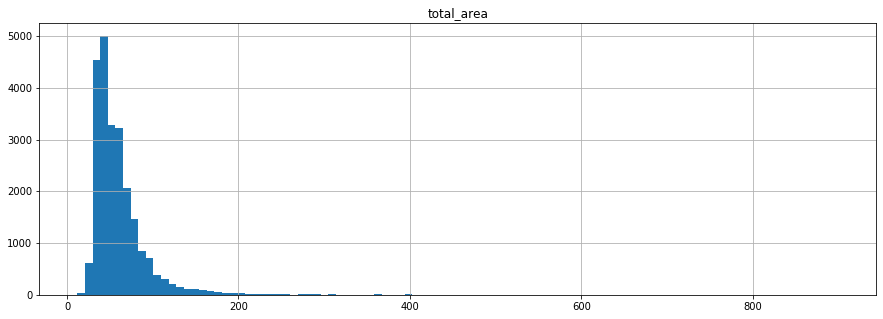

In [27]:
area.hist(column='total_area', bins=100, figsize=(15,5))

На гистограмме общей площади видим, что подавляющее большинство квартир имеет площадь до 100 кв.м., от 100 до 200 это уже "хвост" и квартир с площадью больше ~250 кв.м. буквально единицы, т.е. это выбросы.
Построим гистограмму с диапазоном значений от 0 до 300.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117141f50>]],
      dtype=object)

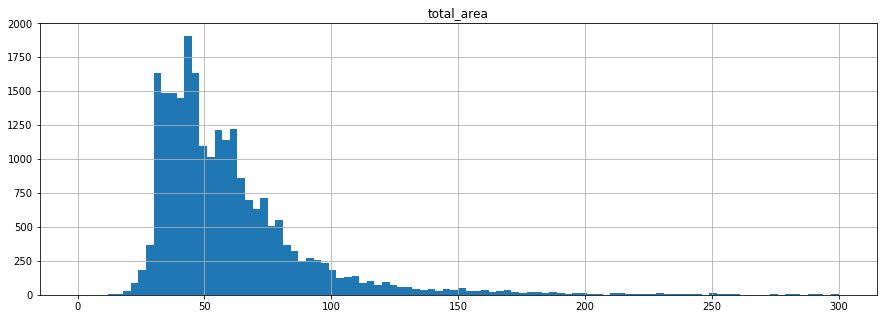

In [28]:
area.hist(column='total_area', bins=100, range=(0, 300), figsize=(15,5))

Здесь уже можно разглядеть поподробнее, что наибольшее количество наблюдений имеет общую площадь около 45 кв.м. Какие-то совсем маленькие площади 10-20 кв.м. - это, скорее всего, комнаты, а не квартиры.

Построим такие графики и для других атрибутов площади.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117325c90>,
      dtype=object)

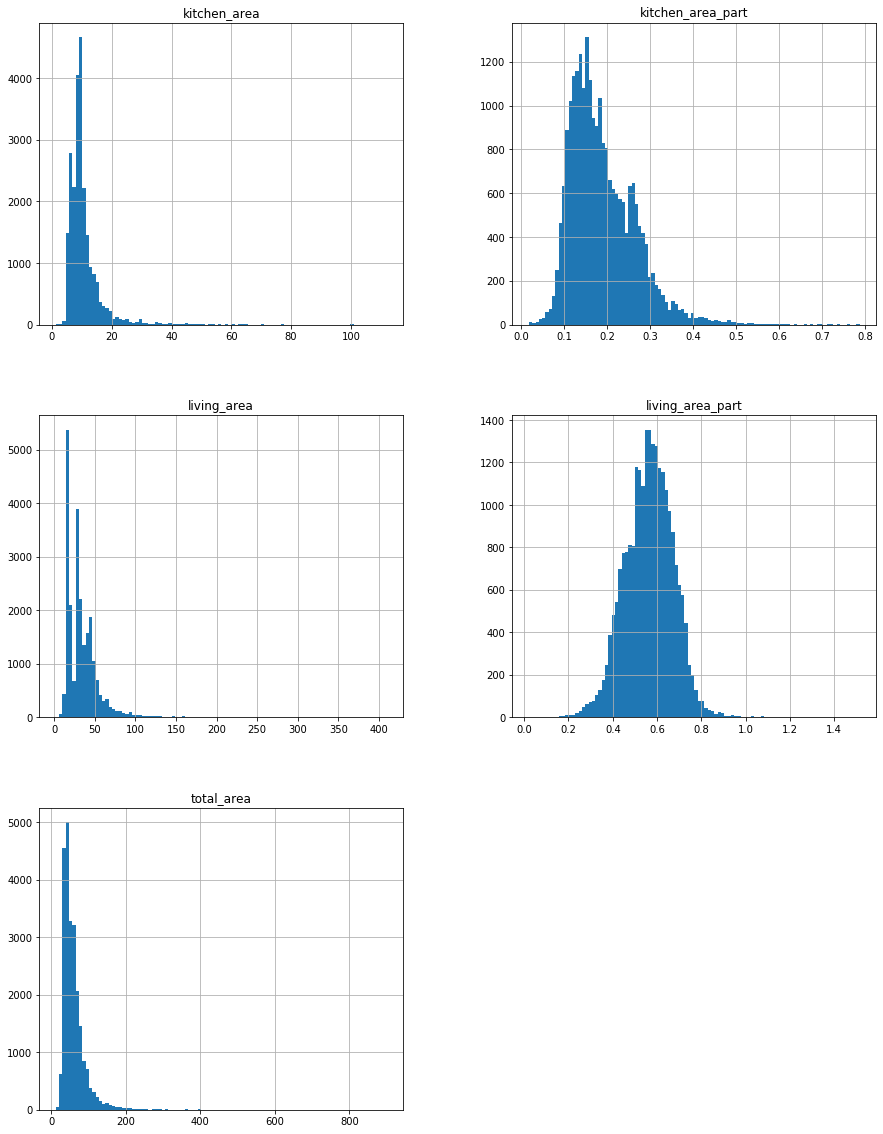

In [29]:
area.hist(bins=100, grid=True, figsize=(15,20))

Можно заметить аномальные значения на гистограммах kitchen_area_part: некоторые значения доходят до 80% от общей площади квартиры, что, скорее всего неправда. Также на гистограмме living_area_part есть выбивающиеся значения, как слишком низкие - меньше 20%, так и слишком высокие - больше 100%, что тоже невозможно. 
В остальном гистограммы выглядят правдоподобно: похожи на нормальное распределение, со смещением влево, потому что большинство квартир на рынке, конечно, небольшой площади, 30-100 кв.м., но есть и длинный "хвост" больших квартир, площадью до 250 кв.м. и более.

#### Цена

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1174bd8d0>]],
      dtype=object)

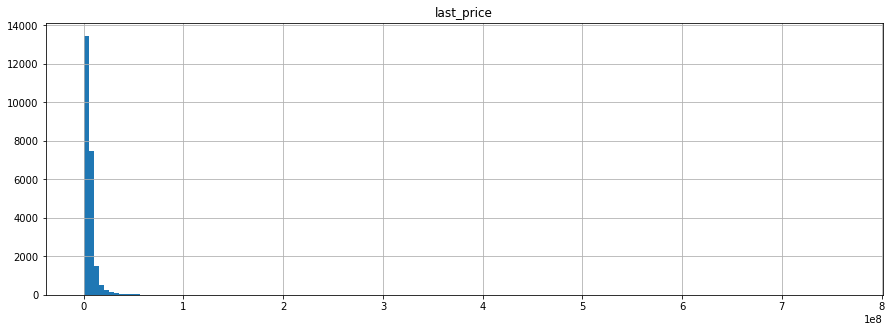

In [30]:
df.hist(column='last_price', bins=150, grid=True, figsize=(15,5))

In [31]:
df['last_price'].describe()

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Здесь из-за формата чисел получается не очень понятная гистограмма, кажется, будто в датасете очень много значений близких к 0, но проверив основные статистические показатели столбца, мы видим, что это не так. Попробуем перевести все цены в миллионы рублей.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118891f10>]],
      dtype=object)

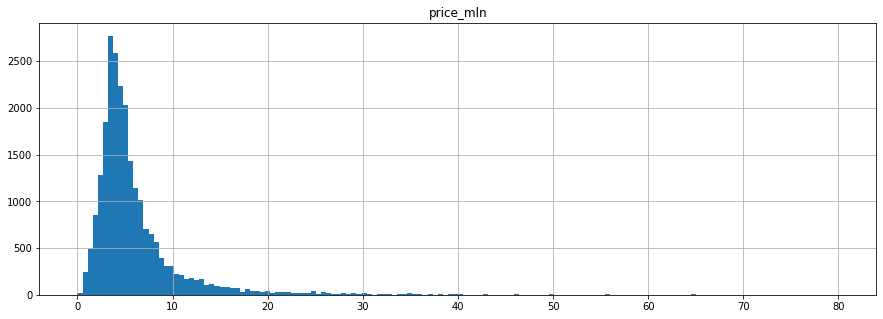

In [32]:
df['price_mln'] = df['last_price'] / 1000000
df.hist(column='price_mln', bins=150, grid=True, figsize=(15,5), range=(0,80))

Здесь снова видим нормальное распределение со сдвигом влево, все в порядке. Большинство наблюдений находятся в диапазоне до 10 млн. Единичные выбросы значений выше 30 млн. руб. Удивительно, что за квартиры с ценой чуть выше 0, проверим.

In [33]:
df.query('price_mln < 1').sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_sq_meter,weekday,month,year,floor_first_last,living_area_part,kitchen_area_part,price_mln
18976,2,720000.0,48.0,2016-03-19,2,NaN,3,30.0,3,False,...,9999.0,288.0,15000.000000,5,3,2016,последний,0.625000,0.166667,0.72
19441,18,800000.0,53.0,2018-06-20,2,NaN,5,30.5,2,False,...,9999.0,45.0,15094.339623,2,6,2018,другой,0.575472,0.171698,0.80
20441,6,600000.0,42.0,2017-10-13,2,NaN,5,31.0,5,False,...,9999.0,29.0,14285.714286,4,10,2017,последний,0.738095,0.142857,0.60
16032,8,480000.0,32.0,2019-01-06,1,NaN,2,16.0,1,False,...,9999.0,83.0,15000.000000,6,1,2019,первый,0.500000,0.284375,0.48
15760,7,780000.0,42.1,2016-05-13,1,2.5,5,17.1,5,False,...,9999.0,750.0,18527.315914,4,5,2016,последний,0.406176,0.213777,0.78


In [34]:
df.query('price_mln < 1')['locality_name'].value_counts()

Сланцы                   83
Бокситогорск             14
Пикалёво                 11
Ивангород                 5
Кириши                    4
                         ..
поселок Цвылёво           1
село Паша                 1
поселок Пчевжа            1
деревня Бор               1
деревня Большой Сабск     1
Name: locality_name, Length: 75, dtype: int64

Кажется, все в порядке. Это не ошибки, это квартиры очень, очень далеко от Санкт-Петербурга в небольших населенных пунктах.

####  Число комнат

In [35]:
df['rooms'].describe()

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1188c7a10>]],
      dtype=object)

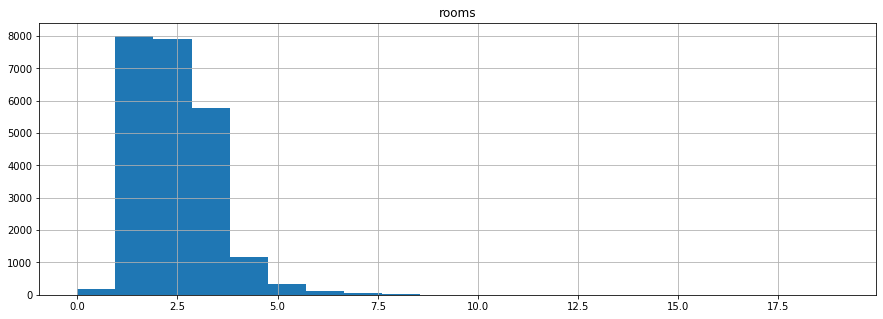

In [36]:
df.hist(column='rooms', bins=20, grid=True, figsize=(15,5))

На гистограмме видим, что большинство наблюдений попадают в диапазон от 1 до 3 комнат, как и ожидалось. Однако есть какие-то значения с 0 комнат. Проверим, что это, возможно студии или свободная планировка.

In [37]:
len(df.query('rooms == 0'))

194

In [38]:
df.query('(rooms == 0) & ((studio == True) | (open_plan == True))')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_sq_meter,weekday,month,year,floor_first_last,living_area_part,kitchen_area_part,price_mln
144,1,2450000.0,27.00,2017-03-30,0,NaN,24,15.50,2,False,...,9999.0,181.0,90740.740741,3,3,2017,другой,0.574074,0.337037,2.450
349,4,2320000.0,25.00,2017-09-27,0,NaN,14,17.00,1,False,...,9999.0,45.0,92800.000000,2,9,2017,первый,0.680000,0.364000,2.320
440,8,2480000.0,27.11,2018-03-12,0,NaN,17,24.75,4,False,...,982.0,64.0,91479.158982,0,3,2018,другой,0.912947,0.335669,2.480
508,0,3375000.0,34.40,2017-03-28,0,NaN,26,24.30,19,False,...,593.0,430.0,98110.465116,1,3,2017,другой,0.706395,0.264535,3.375
608,2,1850000.0,25.00,2019-02-20,0,NaN,10,18.00,7,False,...,9999.0,29.0,74000.000000,2,2,2019,другой,0.720000,0.364000,1.850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.0,26.00,2017-09-01,0,NaN,25,18.00,16,False,...,623.0,14.0,123076.923077,4,9,2017,другой,0.692308,0.350000,3.200
23442,0,2500000.0,27.70,2017-09-28,0,NaN,24,18.00,4,False,...,9999.0,4.0,90252.707581,3,9,2017,другой,0.649819,0.328520,2.500
23554,15,3350000.0,26.00,2018-09-07,0,NaN,19,18.00,8,False,...,112.0,31.0,128846.153846,4,9,2018,другой,0.692308,0.350000,3.350
23592,10,1450000.0,29.00,2017-11-11,0,NaN,9,18.00,8,False,...,9999.0,82.0,50000.000000,5,11,2017,другой,0.620690,0.313793,1.450


Все в порядке, в количестве комнат ошибок нет, все квартиры с 0 комнат - это действительно квартиры свободной планировки и студии.

#### Высота потолков

In [39]:
df['ceiling_height'].describe()

count    14481.000000
mean         2.771283
std          1.261983
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118cd6550>]],
      dtype=object)

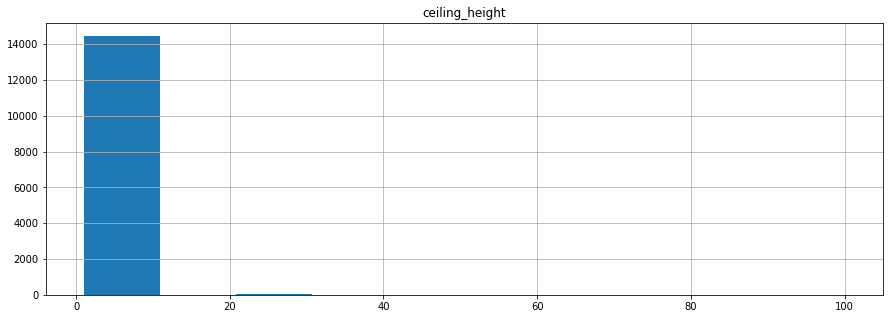

In [40]:
df.hist(column='ceiling_height', grid=True, figsize=(15,5))

Здесь из статистики по столбцу и гистограммы явно видно 3 аномалии:
    1. высота потолка меньше роста человека - минимальное значение всего 1 метр
    2. потолок больше 20 м
    3. максимально высокий потолок 100 м
Это ошибочные значения, от которых нужно будет избавиться, по возможности.

**Вывод**
- Рассчитанные средние и медианы по столбцам площадь, цена, число комнат, высота потолков выглядят правдоподобно.
- Есть артефакты в данных, например, неправильная высота потолка, квартиры с площадью кухни более 70%, и тому подобное. От таких значений нужно будет избавиться, это явные ошибки, которые к тому же могут исказить общую картину.

### Время продажи квартиры

Изучим среднее время продажи квартиры. Построим гистограмму и рассчитаем статистические показатели.
 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114f19c50>]],
      dtype=object)

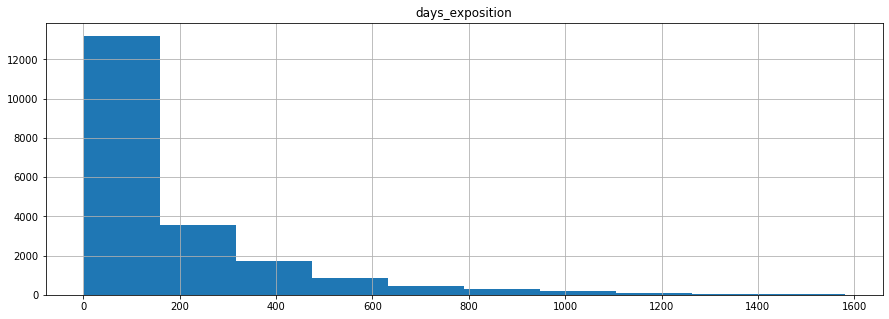

In [41]:
df.hist(column='days_exposition', figsize=(15,5))

In [42]:
df['days_exposition'].describe()

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

**Вывод**

Из гистограммы и статистик видно, что большинство продаж занимают от 1 до приблизительно 180 дней, т.е. менее 6 месяцев.

Среднее значение равно 180 дням, а медианное - 95.
В первом квартиле значения до 45 дней, в этом случае можно говорить, что продажа совершена очень быстро. В то же время, 25% всех продаж занимают свыше 231 дня (3 квартиль), а максимально долгая продажа была 1580 дней, т.е. больше 4 лет! Бывает и такое.

### Выбросы

Уберем редкие и выбивающиеся значения, которые мы обнаружили ранее.

**1) Площадь квартиры**
- выведем еще раз показатели по датафрейму, описывающему только площади.

In [43]:
area.describe()

,total_area,living_area,kitchen_area,living_area_part,kitchen_area_part
count,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000
mean,60.322824,34.324899,10.423234,0.564031,0.189397
std,35.657060,21.722006,5.631746,0.110860,0.075767
min,12.000000,2.000000,1.300000,0.021583,0.018200
25%,40.000000,18.400000,7.300000,0.490716,0.133654
50%,52.000000,30.300000,9.100000,0.566667,0.173913
75%,69.700000,42.700000,11.410000,0.638298,0.234513
max,900.000000,409.700000,112.000000,1.515476,0.787879


Уберем из датасета следующие аномалии:
1. living_area_part больше 100% 
2. living_area_part меньше 20%, так как такое вряд ли вообще возможно
3. kitchen_area_part более 50%, так как на гистограмме мы видели, что таких значений единицы, да и это не очень правдоподобно, что кухня занимает больше половины квартиры

In [44]:
area_error = df.query('(living_area_part > 1) | (living_area_part < 0.2) | (kitchen_area_part > 0.5)')
len(area_error)

128

Всего 128 строк, это не очень много, убираем их без сомнения.

In [45]:
df = df.query('index not in @area_error.index')

#check
df.query('(living_area_part > 1) | (living_area_part < 0.2) | (kitchen_area_part > 0.5)')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_sq_meter,weekday,month,year,floor_first_last,living_area_part,kitchen_area_part,price_mln


**2) Высота потолков**

Также мы уже видели на гистограммах аномальные значения **высоты потолков**. Посмотрим, сколько их.

In [46]:
ceiling_error = df.query('(ceiling_height < 2) | (ceiling_height > 20)')
len(ceiling_error)

25

Всего 25 строк. Смело от них избавляемся.

In [47]:
df = df.query('index not in @ceiling_error.index')

#check
df.query('(ceiling_height < 2) | (ceiling_height > 20)')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_sq_meter,weekday,month,year,floor_first_last,living_area_part,kitchen_area_part,price_mln


**3) Цена**

На гистограмме мы видели, что квартир стоимостью больше 30 млн рублей считанные единицы. Значит такие наблюдения не помогут нам в описании общих рыночных трендов. Можно было бы их исключить из анализа совсем, но тогда мы рискуем исказить данные по центру Петербурга, где самые дорогие квартиры, поэтому лучше создадим отдельный датасет только для таких дорогих квартир и позже рассмотрим отдельно факторы, влияющие на их цену.

In [48]:
#создаем отдельный срез только с дорогими квартирами
expensive_flats = df.query('price_mln >= 30')

#убираем выбивающиеся по цене квартиры из основного датасета
flats = df.query('index not in @expensive_flats.index')

**Вывод**

Итак, в случае с площадями и высотой потолков мы обнаружили аномальные значения и убрали их из датасета, т.к. во-первых, их было не так много, а во-вторых, это были явно ошибочные значения и значит мы не исказили данные.

В случае выбивающихся значений цены все не так однозначно, т.к. цены на недвижимость ничем не ограничены и могут быть сколь угодно высоки. Поэтому для анализа основных рыночных трендов мы убрали слишком дорогие квартиры из основного массива данных, но при этом создали отдельный датасет только для относительно дорогих квартир (стоимостью выше 30 млн рублей).

### Факторы, влияющие на стоимость квартиры

а) Выясним, зависит ли цена от **площади, числа комнат, удалённости от центра**. Для таких расчетов нам понадобится совместное распределение множества величин.

Создадим новый датафрейм, где для каждой квартиры будет 4 значения: цена, площадь, число комнат и удалённость от центра. Построим матрицу диаграмм рассеяния и попарно изучим корреляцию этих 4 факторов.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119282490>,
      dtype=object)

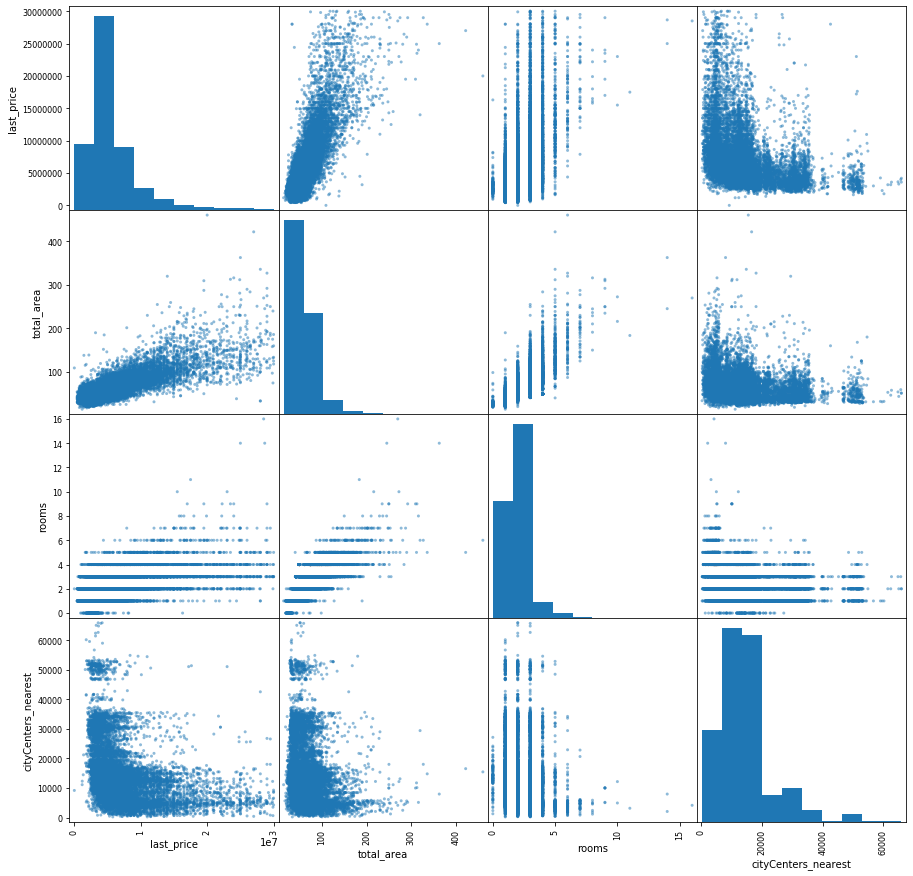

In [49]:
area_room_loc = flats[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']]

pd.plotting.scatter_matrix(area_room_loc, figsize=(15, 15))

- Второй сверху график отображает взаимосвязь цены и площади квартиры. Примерно до 100 м2 цена и площадь тесно взаимосвязаны, а дальше при большей площади квартиры значения рассеяны сильнее, но все равно можно говорить о положительной линейной взаимосвязи, т.е. чем больше квартира, тем она дороже.

- Трейтий сверху график, цена и количество комнат, не показывает линейной взаимосвязи. Можно лишь заметить, что студии и однокомнатные квартиры в среднем стоят меньше, а также что все квартиры с аномально большим числом комнат лежат где-то в верхнем ценовом диапазоне. Но это все было интуитивно понятно и без графиков.

- Если посмотреть на левый нижний график, цена и расстояние от центра, то здесь также нет линейной взаимосвязи.

Рассчитаем попарно коэффициенты корреляции для этих же величин.

In [50]:
area_room_loc.corr()

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.790135,0.525193,-0.345068
total_area,0.790135,1.000000,0.797598,-0.217609
rooms,0.525193,0.797598,1.000000,-0.162152
cityCenters_nearest,-0.345068,-0.217609,-0.162152,1.000000


Здесь нам интересны только значения первой строки, т.е. коэффициент корреляции цены и других факторов.

Самая высокая корреляция между ценой и площадью квартиры, что логично: чем больше квартира, тем дороже она стоит. Коэффициент корреляции цены с количеством комнат и цены с расстоянием от центра говорит о довольно слабой взаимосвязи. 

Возможно стоит изучить влияние этих факторов на цену за квадратный метр, чтобы делать какие-то выводы.

In [51]:
flats[['price_sq_meter', 'total_area', 'rooms', 'cityCenters_nearest']].corr()

,price_sq_meter,total_area,rooms,cityCenters_nearest
price_sq_meter,1.000000,0.127386,-0.069839,-0.377492
total_area,0.127386,1.000000,0.797598,-0.217609
rooms,-0.069839,0.797598,1.000000,-0.162152
cityCenters_nearest,-0.377492,-0.217609,-0.162152,1.000000


Нет, и здесь корреляция цены с количеством комнат и расстоянием от центра довольно низкая. Также стоит обратить внимание, что нет корреляции между общей площадью квартиры и ценой за квадратный метр.

Посмотрим, есть ли какие-нибудь корреляции для этих же факторов в сегменте более дорогих квартир.

In [52]:
expensive_flats[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']].corr()

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.450888,0.202110,-0.129923
total_area,0.450888,1.000000,0.687150,0.119666
rooms,0.202110,0.687150,1.000000,0.059208
cityCenters_nearest,-0.129923,0.119666,0.059208,1.000000


Здесь даже нет сильной зависимости между квадратными метрами и ценой! Значит, на стоимость дорогих квартир влияют совершенно другие факторы.

б) Зависимость цены от того, **на каком этаже расположена квартира**: первом, последнем или другом. 

In [53]:
floor = df.pivot_table(index='floor_first_last', values='price_mln', aggfunc='median')

In [54]:
floor.sort_values(by='price_mln')

,price_mln
floor_first_last,
первый,3.9000
последний,4.3000
другой,4.8465


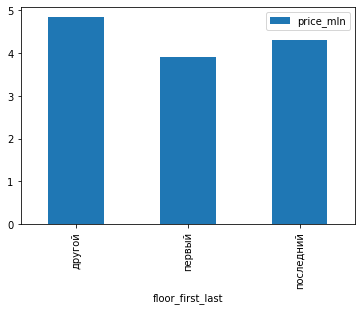

In [55]:
floor.plot(kind='bar')

Как видно из сводной таблицы, действительно есть взаимосвязь между ценой квартиры и этажом. Квартиры на первом этаже в среднем на 900 тысяч рублей дешевле, чем другие, а квартиры на последнем этаже в среднем дешевле почти на 600 тысяч.

в) Зависимость цены от **даты размещения**: дня недели, месяца и года.

Выделим столбцы 'last_price', 'weekday', 'month', 'year' в отдельную таблицу и снова построим матрицу диаграмм рассеяния.

In [56]:
date_price = df[['last_price', 'weekday', 'month', 'year']]
date_price.head()

,last_price,weekday,month,year
0,13000000.0,3,3,2019
1,3350000.0,1,12,2018
2,5196000.0,3,8,2015
3,64900000.0,4,7,2015
4,10000000.0,1,6,2018


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a319410>,
      dtype=object)

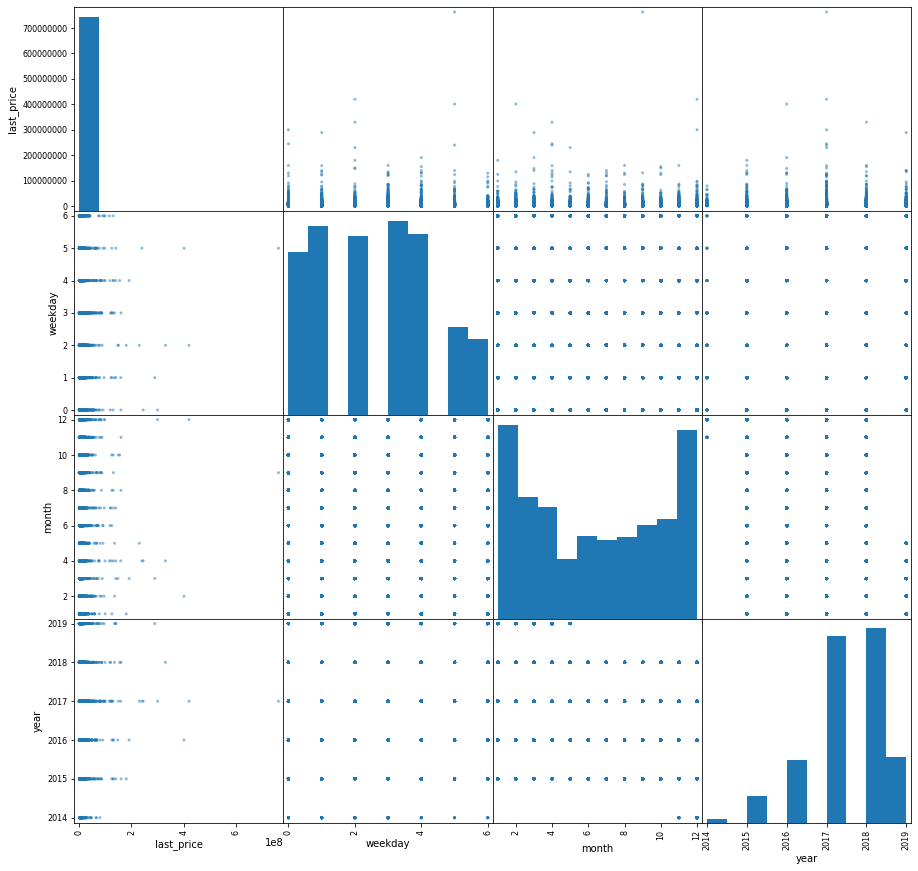

In [57]:
pd.plotting.scatter_matrix(date_price, figsize=(15, 15))

In [58]:
date_price.corr()

,last_price,weekday,month,year
last_price,1.000000,0.000795,0.003359,-0.041884
weekday,0.000795,1.000000,0.012522,-0.002377
month,0.003359,0.012522,1.000000,-0.270909
year,-0.041884,-0.002377,-0.270909,1.000000


Линейных зависимостей здесь нет, лучше построим столбчатые диаграммы.

         last_price
weekday            
0         4650000.0
1         4700000.0
2         4700000.0
3         4650000.0
4         4550000.0
5         4550000.0
6         4550000.0


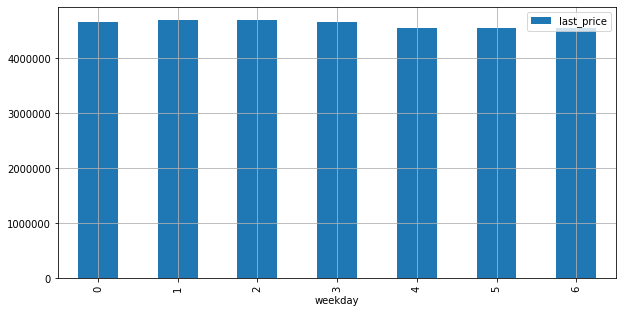

In [59]:
weekday_pivot = date_price.pivot_table(index='weekday', values='last_price', aggfunc='median')
print(weekday_pivot)

weekday_pivot.plot(kind='bar', figsize=(10,5), grid=True)

В среднем, цены ниже в объявлениях, размещенных в конце недели (пт-вс).

       last_price
month            
1       4600000.0
2       4650000.0
3       4650000.0
4       4800000.0
5       4500000.0
6       4400000.0
7       4600000.0
8       4570000.0
9       4700000.0
10      4570000.0
11      4700000.0
12      4700000.0


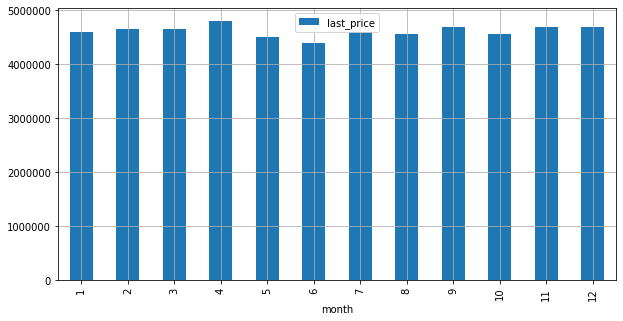

In [60]:
month_pivot = date_price.pivot_table(index='month', values='last_price', aggfunc='median')
print(month_pivot)

month_pivot.plot(kind='bar', figsize=(10,5), grid=True)

Здесь нет четкой тенденции, но можно увидеть, что самые высокие цены приходятся на апрель, а самые низкие - на июнь.

      last_price
year            
2014   7700000.0
2015   5300500.0
2016   4500000.0
2017   4500000.0
2018   4575000.0
2019   5050000.0


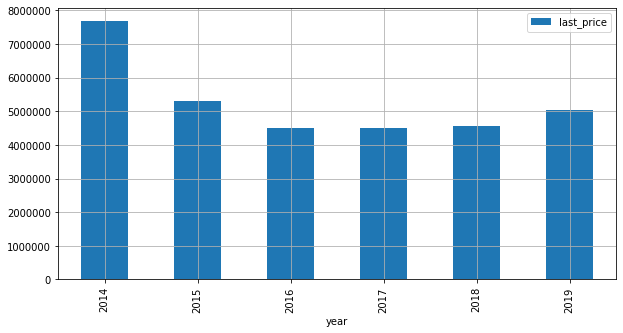

In [61]:
year_pivot = date_price.pivot_table(index='year', values='last_price', aggfunc='median')
print(year_pivot)

year_pivot.plot(kind='bar', figsize=(10,5), grid=True)

Наблюдается падение цен с 2015 года, но к 2019 цены на недвижимость снова начали расти.

**Вывод**

Мы выяснили, что для большинства объявлений существует зависимость цены зависит от площади, этажа и даже от даты размещения: дня недели, месяца и года. Дороже стоят квартиры:
- с большей площадью
- расположенные не на первом или последнем этаже
- объявление размещено в будни
- объявление размещено не в 2016-2018 гг, т.к. на это время пришлось падение цен на недвижимость.

Зависимость цены от числа комнат, удалённости от центра не выявлена: либо ее нет, либо она носит не линейный характер.

### Средняя цена по 10 населенным пунктам

Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.

In [62]:
popular_localities = df.pivot_table(index='locality_name', 
               values='price_sq_meter', 
               aggfunc=['count','mean'])

popular_localities.head()

,count,mean
,price_sq_meter,price_sq_meter
locality_name,,
Бокситогорск,16,17551.591819
Волосово,36,40183.325974
Волхов,110,35055.143633
Всеволожск,395,68683.623418
Выборг,236,58154.339559


Круто. Теперь избавимся от мультииндексов и отсортируем таблицу по количеству объявлений. Оставим только верхние 10 строк.

In [63]:
popular_localities.reset_index(inplace=True)

popular_localities.columns = ['locality_name', 'count_of_ad', 'price_sq_meter']

#Сортируем по убыванию и оставляем только 10 верхних строк в таблице
popular_localities = popular_localities.sort_values(by='count_of_ad', ascending=False)[:10]
popular_localities

,locality_name,count_of_ad,price_sq_meter
33,Санкт-Петербург,15545,114650.427069
290,посёлок Мурино,514,85563.182760
325,посёлок Шушары,437,78554.913659
3,Всеволожск,395,68683.623418
32,Пушкин,367,103207.135335
13,Колпино,338,75424.579098
295,посёлок Парголово,327,90175.913458
6,Гатчина,305,68947.384358
93,деревня Кудрово,299,92473.547576
4,Выборг,236,58154.339559


А теперь получившуюся таблицу по топ-10 населенным пунктам отсортируем по цене за квадратный метр.

In [64]:
popular_localities.sort_values(by='price_sq_meter', ascending=False)

,locality_name,count_of_ad,price_sq_meter
33,Санкт-Петербург,15545,114650.427069
32,Пушкин,367,103207.135335
93,деревня Кудрово,299,92473.547576
295,посёлок Парголово,327,90175.913458
290,посёлок Мурино,514,85563.182760
325,посёлок Шушары,437,78554.913659
13,Колпино,338,75424.579098
6,Гатчина,305,68947.384358
3,Всеволожск,395,68683.623418
4,Выборг,236,58154.339559


**Вывод**

Как видно из сводной таблицы, дороже всего квартиры в Санкт-Петербурге: в среднем 114,8 тысяч рублей за квадратный метр.
На втором месте Пушкин: 103 тыс. рублей за квадратный метр.

А самые недорогие квартиры в Выборге: всего 58 тыс.рублей за метр, что почти вдвое дешевле, чем в СПб.

### Квартиры в центре Санкт-Петербурга


- Первая задача — выяснить, какая область входит в центр. 

Выделим только квартиры в Санкт-Петербурге. Создадим столбец с расстоянием до центра в километра и для удобства округлим до целых значений. 

In [65]:
#Выделим новый датафрейм только с квартирами в СПб
spb = df.query('locality_name == "Санкт-Петербург"').copy()

#Добавляем столбец с расстоянием до центра в км
spb['km_to_center'] = (spb['cityCenters_nearest'] / 1000).astype('int')

#Для удобства, оставим только столбцы, необходимые для расчетов
spb_prices = spb[['km_to_center', 'last_price']]
spb_prices.reset_index(drop=True, inplace=True)

Посчитаем среднюю цену для каждого километра в сводной таблице. 

In [66]:
spb_pivot = spb_prices.pivot_table(index='km_to_center', values='last_price')
spb_pivot.head()

,last_price
km_to_center,
0,2.368987e+07
1,1.901479e+07
2,1.624582e+07
3,1.348691e+07
4,1.346839e+07


Пока не очень наглядно из-за формата вывода цены. Для большей наглядности можно разделить среднюю цену на 1 млн. Запишем цену в млн в новом столбце.

In [67]:
spb_pivot['price_mln'] = spb_pivot['last_price'] / 1000000

Построим график: он должен показывать, как цена зависит от удалённости от центра. Определим границу, где график сильно меняется — это и будет центральная зона.

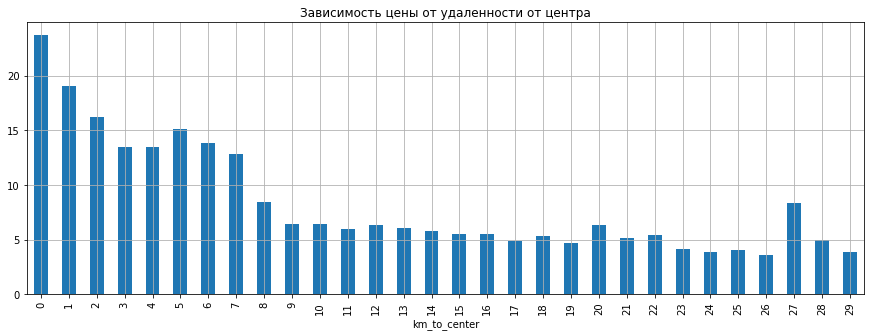

In [68]:
spb_pivot.plot(y='price_mln', 
               kind='bar', 
               grid=True, 
               legend=False, 
               title='Зависимость цены от удаленности от центра', 
               figsize=(15,5))

Глядя на график, если сравнить значения 7го и 8го км, то можно сказать, что где-то между ними проходит условная "психологическая" отметка цены в 10 млн рублей. Поэтому будем считать, что граница центра Петербурга у нас очерчена радиусом 7 км.

- Выделим сегмент квартир в центре в отдельный датафрейм и проанализируем эту территорию. Изучим следующие параметры: площадь, цена, число комнат, высота потолков. 

In [69]:
central = spb.query('km_to_center < 8')
central[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,3662.000000,3.662000e+03,3662.000000,2381.000000
mean,91.801092,1.461530e+07,2.820590,3.079605
std,58.837593,2.462269e+07,1.453375,0.382043
min,17.000000,1.800000e+06,0.000000,2.000000
25%,56.000000,6.591500e+06,2.000000,2.800000
50%,77.700000,9.000000e+06,3.000000,3.000000
75%,108.400000,1.400000e+07,3.000000,3.270000
max,900.000000,7.630000e+08,19.000000,6.000000


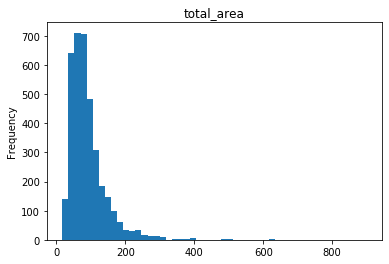

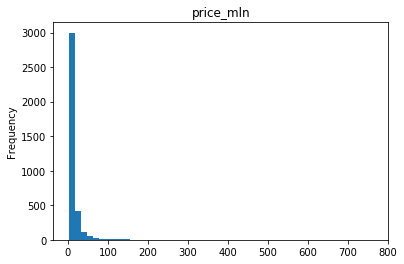

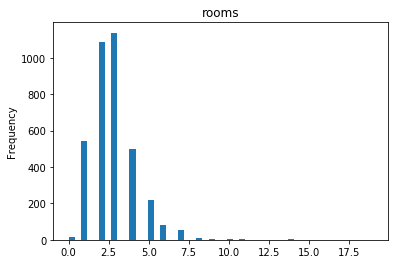

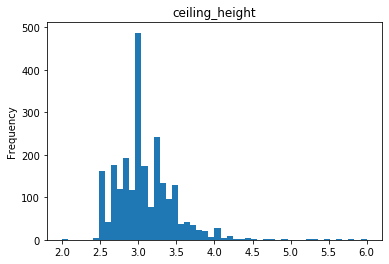

In [70]:
import matplotlib.pyplot as plt
for col in central[['total_area', 'price_mln', 'rooms', 'ceiling_height']]:
    central[col].plot(title=col, kind='hist', bins=50)
    plt.show()

Распределения по площади, количеству комнат и высоте потолков очень похожи на те же значения по всему городу. А вот цены стоит рассмотреть поближе.

Центр:
count    3662.000000
mean       14.615295
std        24.622685
min         1.800000
25%         6.591500
50%         9.000000
75%        14.000000
max       763.000000
Name: price_mln, dtype: float64

Все значения:
count    23412.000000
mean         6.515103
std         10.837342
min          0.012190
25%          3.411750
50%          4.650000
75%          6.765044
max        763.000000
Name: price_mln, dtype: float64


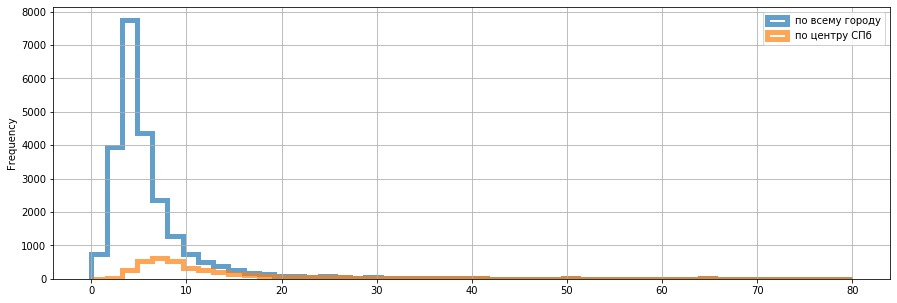

In [71]:
print('Центр:')
print(central['price_mln'].describe())
print()
print('Все значения:')
print(df['price_mln'].describe())

ax = df.plot(kind='hist', 
             y='price_mln', 
             histtype='step', 
             range=(0, 80), 
             bins=50, 
             linewidth=5, 
             alpha=0.7, 
             label='по всему городу')
central.plot(kind='hist', 
             y='price_mln', 
             histtype='step', 
             range=(0, 80), 
             bins=50, 
             linewidth=5, 
             alpha=0.7, 
             label='по центру СПб', 
             ax=ax, 
             grid=True, 
             legend=True,
             figsize=(15,5))

Как и стоило ожидать, цены в центре Санкт-Петербурга на порядок выше цен по всему городу. Так, средняя цена в центре равна 14,6 млн рублей, а по всему городу 6,5 млн. Минимальная цена по всему городу меньше 1 млн, а в центре самые дешевые квартиры стоят от 1,8 млн и выше. Также у гистограммы по центру длиннее "хвост", т.к. здесь находятся самые дорогие квартиры из всех.

- Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

In [72]:
central[['last_price', 'rooms', 'floor_first_last','km_to_center', 'weekday', 'month', 'year']].corr()

,last_price,rooms,km_to_center,weekday,month,year
last_price,1.000000,0.336432,-0.057466,0.021175,-0.004313,-0.039862
rooms,0.336432,1.000000,-0.184666,-0.008456,-0.020623,-0.060291
km_to_center,-0.057466,-0.184666,1.000000,0.022366,0.004323,0.031617
weekday,0.021175,-0.008456,0.022366,1.000000,0.026684,0.001104
month,-0.004313,-0.020623,0.004323,0.026684,1.000000,-0.240471
year,-0.039862,-0.060291,0.031617,0.001104,-0.240471,1.000000


Ни по одному из показателей не наблюдается сильной корреляции с ценой. Значит взаимосвязи или нет, или она не линейная. Построим столбчатые диаграммы и посмотрим, похожи ли взаимосвязи на те, что мы видели на всей совокупности наблюдений ранее.

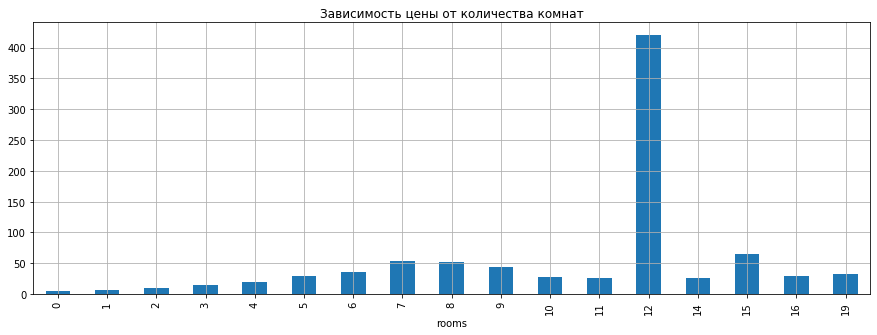

In [73]:
central.pivot_table(index='rooms', values='price_mln').plot(y='price_mln', 
                                                            kind='bar', 
                                                            grid=True, 
                                                            legend=False, 
                                                            title='Зависимость цены от количества комнат', 
                                                            figsize=(15,5))

Здесь в целом можно сказать, что чем больше комнат, тем дороже (тем больше площадь квартиры). Есть небольшой выброс на 12-комнатной квартире, но здесь скорее всего, повлияли и другие факторы.

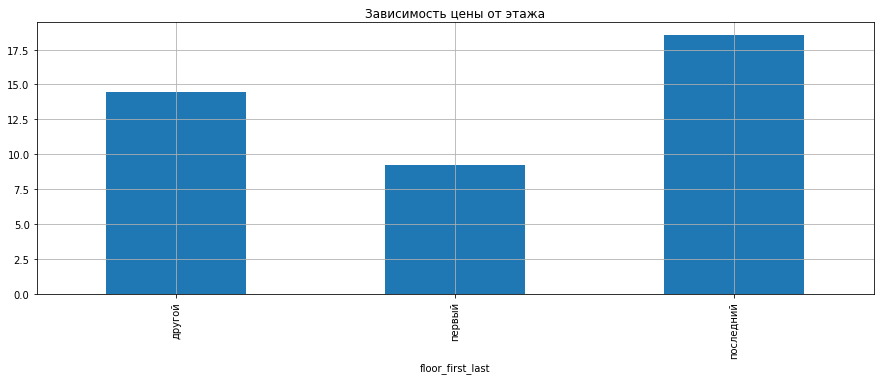

In [74]:
central.pivot_table(index='floor_first_last', values='price_mln').plot(y='price_mln', 
                                                                    kind='bar', 
                                                                    grid=True, 
                                                                    legend=False, 
                                                                    title='Зависимость цены от этажа', 
                                                                    figsize=(15,5))

Здесь снова подтверждается, что цена сильно зависит от этажа. В отличие от остальных районов, в центре Санкт-Петербурга самыми дорогими являются квартиры на последнем этаже (крыши! вид!). Самые дешевые квартиры, как и везде - на первом этаже.

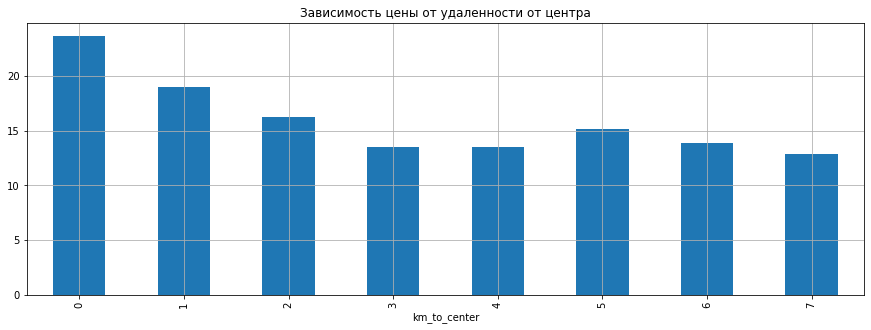

In [75]:
central.pivot_table(index='km_to_center', values='price_mln').plot(y='price_mln', 
                                                                    kind='bar', 
                                                                    grid=True, 
                                                                    legend=False, 
                                                                    title='Зависимость цены от удаленности от центра', 
                                                                    figsize=(15,5))

Здесь нет явной зависимости: цена примерно одинакова и на 3, и на 6 км.

         last_price
weekday            
0         9325000.0
1         9000000.0
2         9095000.0
3         9100000.0
4         8945000.0
5         8525000.0
6         9200000.0


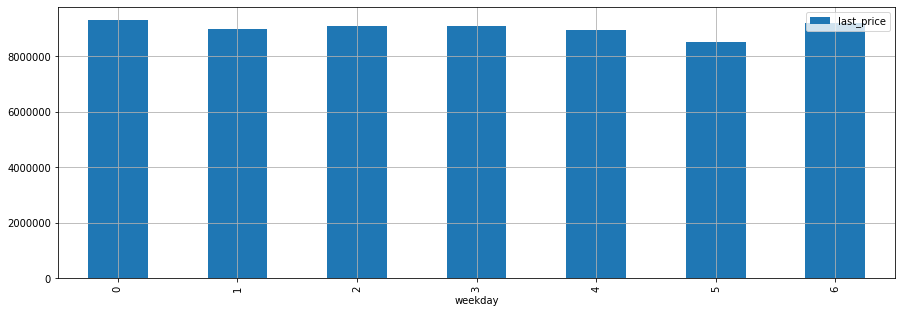

In [76]:
weekday = central.pivot_table(index='weekday', values='last_price', aggfunc='median')
print(weekday)

weekday.plot(kind='bar', figsize=(15,5), grid=True)

В среднем, цены ниже всего в объявлениях, размещенных в субботу.

       last_price
month            
1       9900000.0
2       9500000.0
3       9425000.0
4       8850000.0
5       8684000.0
6       8750000.0
7       9000000.0
8       8900000.0
9       9400000.0
10      8620522.0
11      9300000.0
12      8500000.0


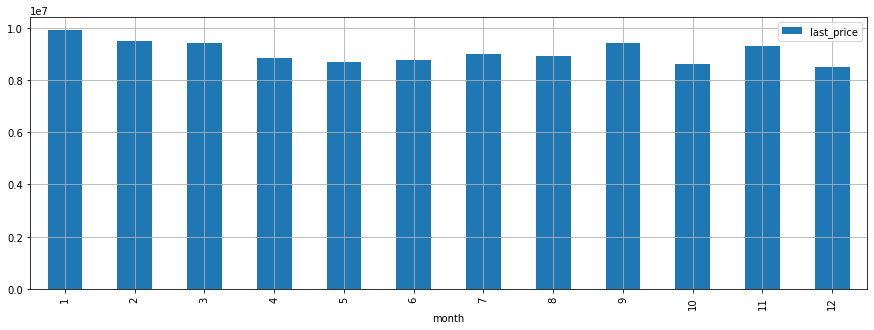

In [77]:
month = central.pivot_table(index='month', values='last_price', aggfunc='median')
print(month)

month.plot(kind='bar', figsize=(15,5), grid=True)

Здесь нет четкой тенденции, но можно увидеть, что самые высокие цены приходятся на январь-февраль, а самые низкие - на декабрь.

      last_price
year            
2014  19800000.0
2015   9990000.0
2016   9375000.0
2017   8990000.0
2018   8750000.0
2019   9400000.0


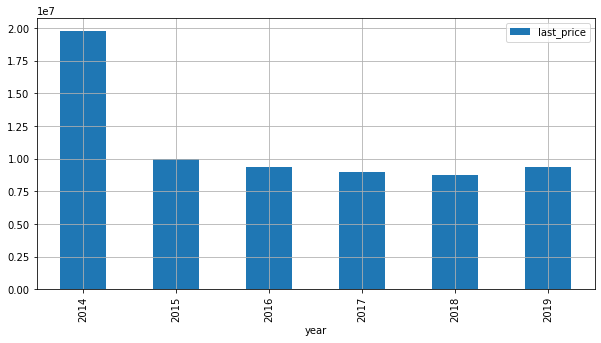

In [78]:
year = central.pivot_table(index='year', values='last_price', aggfunc='median')
print(year)

year.plot(kind='bar', figsize=(10,5), grid=True)

Здесь, в отличие от всей совокупности, резкое падение цен началось не в 2016, а уже в 2015 году. К 2019 рынок еще так и не восстановился до уровня 2015 года.

**Вывод**

Мы выделили сегмент квартир в центре Санкт-Петербурга в радиусе до 7 км от центра. Изучив взаимосвязи нескольких факторов, мы выяснили, что цена зависит от этажа (самые дорогие квартиры на последних этажах), количества комнат (и размера квартиры, соответственно) и даты размещения (минимальные цены в объявлениях, размещенных в 2018 году).

Главное отличие центра от остальных районов это более высокие цены на недвижимость, а также фактор последнего этажа.

## Заключение и выводы

- **В первой части проекта** мы рассмотрели исходные данные, оценили объем датасета и основные типы данных.


- **Во второй части** были проведены различные операции предобработки данных:
    1. Поиск и заполнение пропусков 
        - Для уменьшения искажения данных пропуски заполнялись медианными значениями, там где это было возможно по подгруппам в разрезе населенного пункта или количества комнат.
        - В столбцах `locality_name` и `floors_total` адекватной замены пропускам не было, поэтому строки с ними были просто удалены.
    2. Также мы изменили типы данных с вещественного на числовой в тех столбцах, где это было возможно, и в столбце `first_day_exposition` привели данные к типу datetime.
    
    
- **В третьей части проекта** были рассчитаны и добавлены в таблицу данные:
    1. цена 1 квадратного метра;
    2. день недели, месяц и год публикации объявления;
    3. этаж квартиры; варианты — первый, последний, другой;
    4. соотношение жилой и общей площади, а также отношение площади кухни к общей.


- **В четвертой части** был выполнен исследовательский анализ данных:
    1. Изучены следующие параметры: площадь, цена, число комнат, высота потолков, время продажи квартиры. Построены гистограммы для каждого признака и рассчитаны основные характеристики методом describe(). Мы выяснили, что чаще всего квартиры продаются менее чем за 6 месяцев, а менее 45 дней можно считать быстрой продажей. Есть и необычно долгие продажи, до нескольких лет.
    2. Удалены аномальные значения площади и высоты потолков (например, потолки высотой 100 м, или жилая площадь большей общей площади квартиры). Выбросы значений по цене удалять не стали, чтобы не исказить данные, и далее использовать для анализа по центру Санкт-Петербурга.
    3. Выяснили какие факторы больше всего влияют на стоимость квартиры: площадь, этаж, год размещения. 
    4. Выделены 10 населённых пунктов с наибольшим числом объявлений, и для них рассчитана цена квадратного метра. Среди 10 популярных локаций самые дорогие квартиры расположены в Санкт-Петербурге и Пушкине, а самые дешевые - в Выборге.
    5. Выделен и изучен сегмент квартир в центре Санкт-Петербурга. Проанализированы параметры: площадь, цена, число комнат, высота потолков. Также выделены факторы, которые влияют на стоимость квартиры: число комнат, этаж, дата размещения объявления. В отличие от остальных районов, в центре дороже всего оценены квартиры на последнем этаже.